TASK 1 - STOCK PREDICTION - KARANAM VENKATA SAI ESWAR



In [1]:
import numpy as np
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Stocks.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [4]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
df.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Text(0, 0.5, 'Prices ($)')

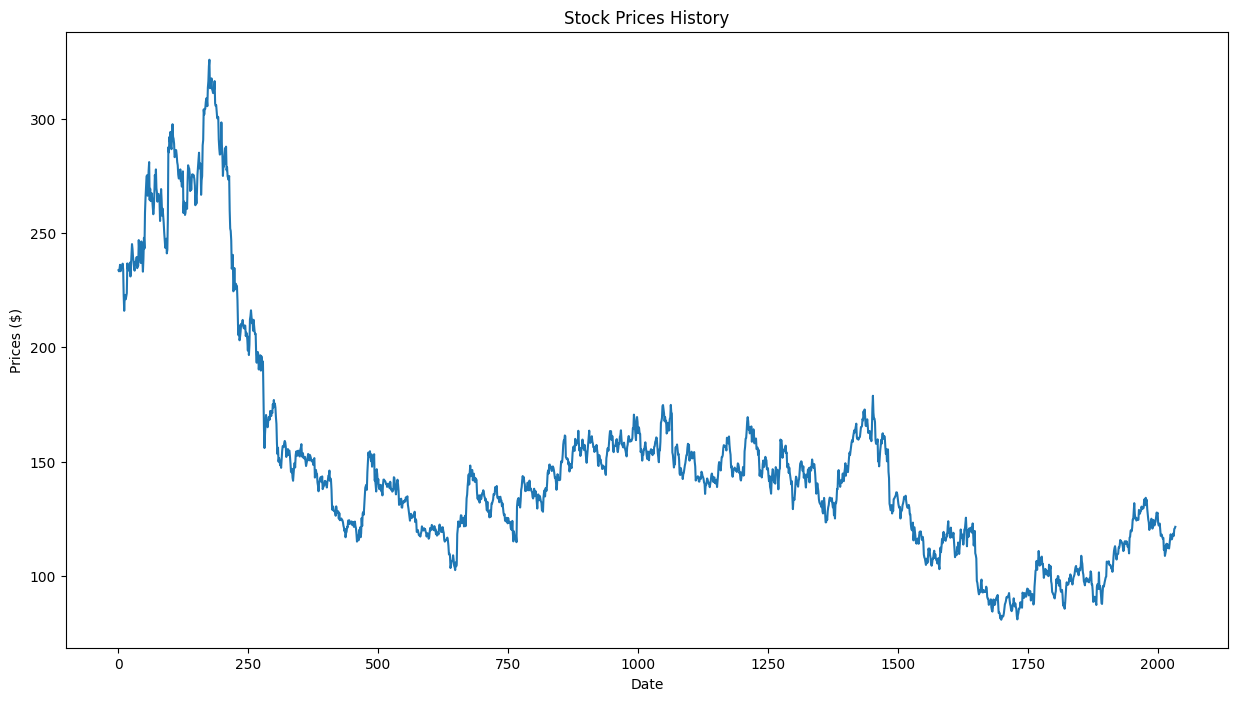

In [7]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

<ipython-input-8-f780889f7a2f>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(7).mean().head(15)
<ipython-input-8-f780889f7a2f>:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(window=30).mean()['Open'].plot()


<Axes: >

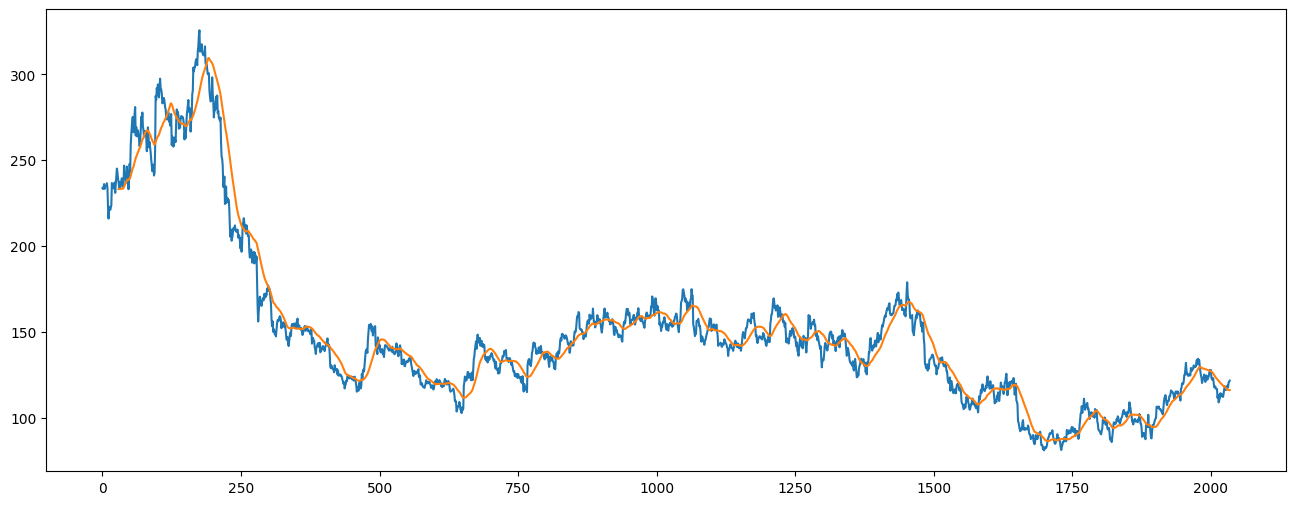

In [8]:
df.rolling(7).mean().head(15)
df['Close'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Open'].plot()

In [9]:
df1 = df.reset_index()['Close']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1) )
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [10]:
train_size = int(len(df1)*0.75)
test_size = len(df1) - train_size
train_size, test_size

(1526, 509)

In [11]:
train_data, test_data = df1[0:train_size: ], df1[train_size:len(df1), :1]

In [12]:
def create_dataset(dataset, time_step = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i+time_step,0])
    return numpy.array(data_x), numpy.array(data_y)

In [13]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [14]:
x_train
x_test

array([[0.1621732 , 0.15972222, 0.16278595, ..., 0.14644608, 0.15216503,
        0.1435866 ],
       [0.15972222, 0.16278595, 0.17340686, ..., 0.15216503, 0.1435866 ,
        0.13419118],
       [0.16278595, 0.17340686, 0.14174837, ..., 0.1435866 , 0.13419118,
        0.1431781 ],
       ...,
       [0.13827614, 0.13541667, 0.13010621, ..., 0.14562908, 0.15236928,
        0.15400327],
       [0.13541667, 0.13010621, 0.12254902, ..., 0.15236928, 0.15400327,
        0.14971405],
       [0.13010621, 0.12254902, 0.12479575, ..., 0.15400327, 0.14971405,
        0.1621732 ]])

In [15]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

from keras.layers import Dropout,  Bidirectional

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, epochs=80,validation_data=(x_test, y_test), verbose=1)

Epoch 1/80
45/45 [==============================] - 20s 286ms/step - loss: 0.0170 - val_loss: 0.0018
Epoch 2/80
45/45 [==============================] - 10s 225ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 3/80
45/45 [==============================] - 7s 160ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 4/80
45/45 [==============================] - 9s 212ms/step - loss: 0.0013 - val_loss: 8.7702e-04
Epoch 5/80
45/45 [==============================] - 9s 204ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 6/80
45/45 [==============================] - 11s 257ms/step - loss: 0.0010 - val_loss: 7.2833e-04
Epoch 7/80
45/45 [==============================] - 6s 143ms/step - loss: 9.2937e-04 - val_loss: 0.0011
Epoch 8/80
45/45 [==============================] - 8s 180ms/step - loss: 9.5374e-04 - val_loss: 8.3280e-04
Epoch 9/80
45/45 [==============================] - 6s 143ms/step - loss: 8.2320e-04 - val_loss: 8.0088e-04
Epoch 10/80
45/45 [==============================] - 8s 169ms/step - 

In [19]:
test_predict = model.predict(x_test)
train_predict = model.predict(x_train)

45/45 [==============================] - 2s 37ms/step


In [20]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [21]:
back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[back:len(train_predict)+back, :] = train_predict

In [22]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(back*2)+1:len(df1)-1, :] = test_predict

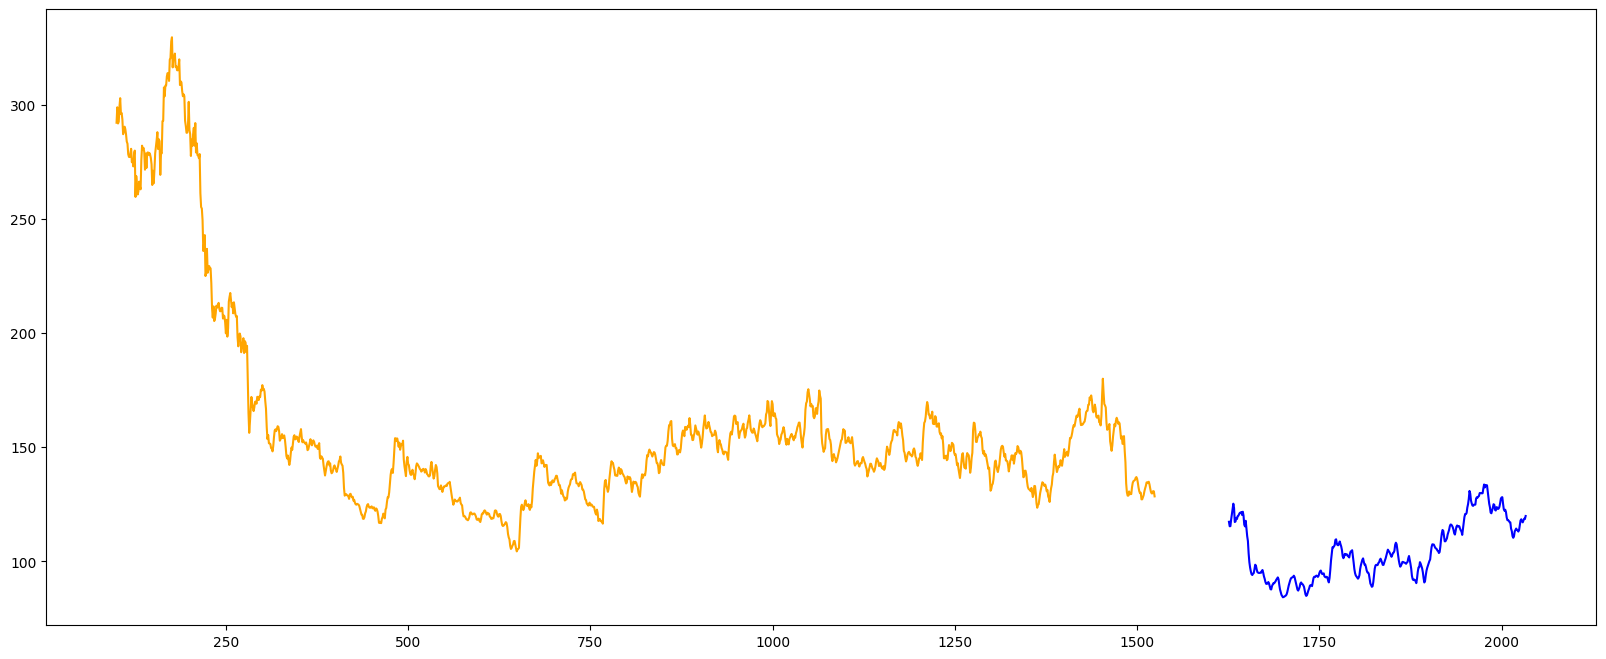

In [23]:
plt.subplots(figsize=(20,8))
plt.plot(trainPredictPlot,color='orange')
plt.plot(testPredictPlot,color='blue')
plt.show()

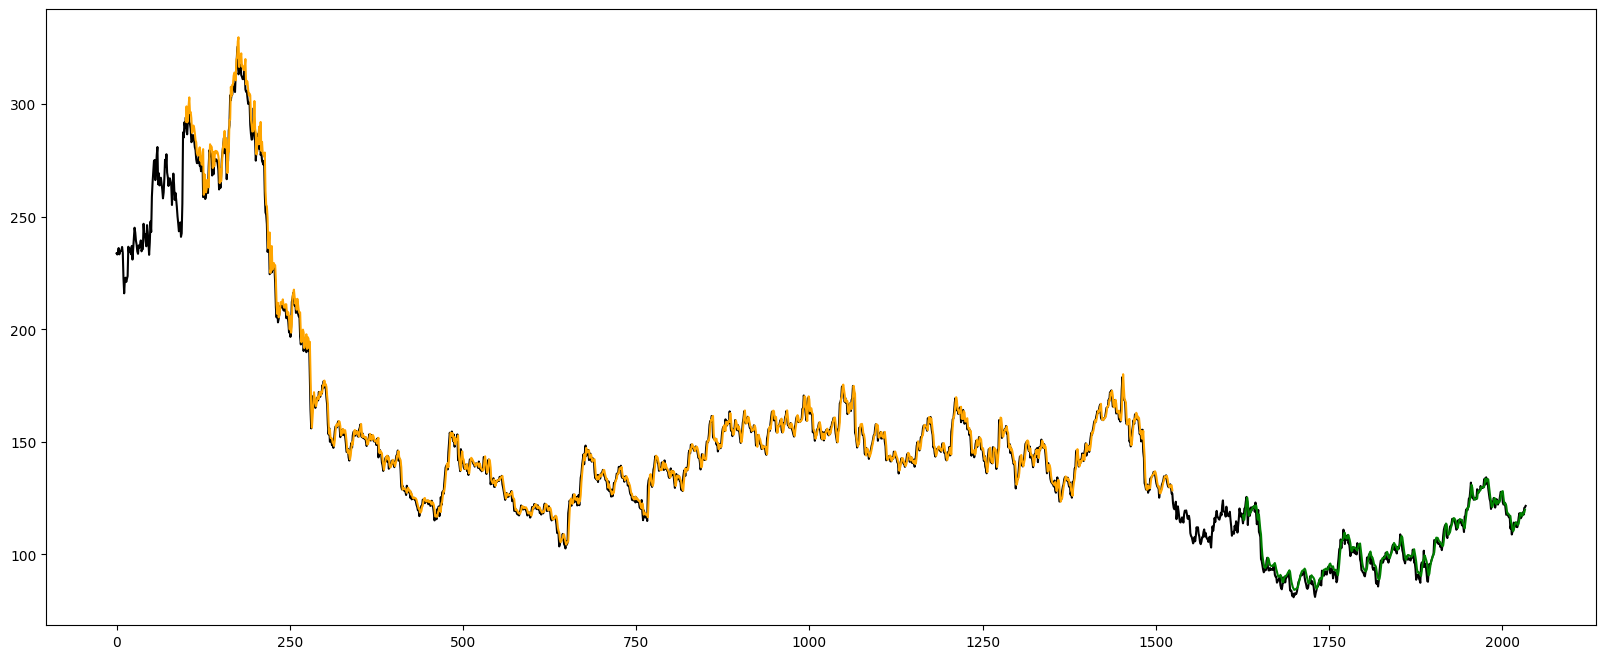

In [24]:
plt.subplots(figsize=(20,8))
plt.plot(scaler.inverse_transform(df1), color = 'black')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'green')
plt.show()